In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [44]:
wasm_distributed_100 = pd.read_csv('one-at-a-time/one-invocation_wasm-distributed_100.csv', sep=';', parse_dates=['time_utc']).query('workflow_result=="succeeded" and processing_ms > 0')
wasm_distributed_100.index = pd.to_datetime(wasm_distributed_100['time_utc'])
container_100 = pd.read_csv('one-at-a-time/one-invocation_container_100.csv', sep=';', parse_dates=['time_utc']).query('workflow_result=="succeeded" and processing_ms > 0')
container_100.index = pd.to_datetime(container_100['time_utc'])

grouped_wasm_distributed_100 = wasm_distributed_100.resample('5T').count()
grouped_wasm_distributed_100.insert(loc=0, column='period', value=np.arange(len(grouped_wasm_distributed_100)))
grouped_container_100 = container_100.resample('5T').count()
grouped_container_100.insert(loc=0, column='period', value=np.arange(len(grouped_container_100)))

grouped_wasm_distributed_100 = grouped_wasm_distributed_100[['period', 'processing_ms']].rename(columns={'period':'period','processing_ms':'count'})
grouped_container_100 = grouped_container_100[['period', 'processing_ms']].rename(columns={'period':'period','processing_ms':'count'})

grouped_container_100

,period,count
time_utc,,
2022-06-19 18:20:00+00:00,0,83
2022-06-19 18:25:00+00:00,1,517
2022-06-19 18:30:00+00:00,2,600
2022-06-19 18:35:00+00:00,3,500
2022-06-19 18:40:00+00:00,4,600
2022-06-19 18:45:00+00:00,5,546
2022-06-19 18:50:00+00:00,6,554
2022-06-19 18:55:00+00:00,7,600
2022-06-19 19:00:00+00:00,8,600


<AxesSubplot:xlabel='period', ylabel='count'>

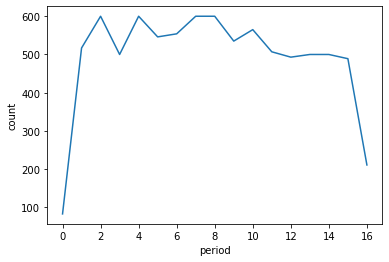

In [45]:
sns.lineplot(x='period', y='count', data=grouped_container_100)

In [80]:
fig.savefig("performance.pdf")